# Algoritmos de optimización - Seminario<br>
Nombre y Apellidos: Antonio Manuel Míguez Vega  <br>
Url: https://github.com/ammiguezvega/MIAR/blob/main/Seminario_Algoritmos.ipynb<br>
Problema:
> 1. #### **Sesiones de doblaje**
> 2. ~~Organizar los horarios de partidos de La Liga~~<br>
> 3. ~~Combinar cifras y operaciones~~

### Descripción del problema:

Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de
doblaje cobran toda la misma cantidad por cada día que deben desplazarse hasta el estudio de
grabación independientemente del número de tomas que se graben. No es posible grabar más
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

Número de actores: 10 <br>
Número de tomas : 30  <br>
- 1 indica que el actor participa en la toma
- 0 en caso contrario

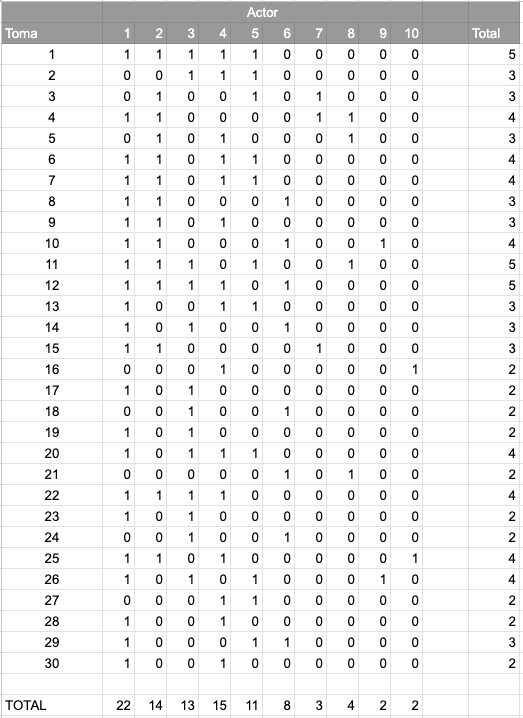




<br>
(*) La respuesta es obligatoria
                                       

In [98]:
# Imports
import numpy as np
from itertools import combinations


# Definimos los datos del problema
num_actores = 10
num_tomas = 30
max_tomas_por_dia = 6

### Apartado 1:

(*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.


#### Respuesta

**1. ¿Cuántas posibilidades hay sin tener en cuenta las restricciones?**

Sin tener en cuenta las restricciones, el problema se reduce a asignar cada una de las 30 tomas a un día cualquiera. Si no hay límite en el número de días ni en el número de tomas por día, cada toma puede asignarse a cualquier día de forma independiente.
- Si asumimos que no hay un límite en el número de días, el número de posibilidades es infinito.
- Si asumimos que hay un límite en el número de días (por ejemplo D días), entonces cada toma tiene D opciones, y el número total de posibilidades es $D^{30}$.

Por ejemplo, si D=30 (un día por toma), el número de posibilidades sería $30^{30}$, que es un número extremadamente grande.

**2. ¿Cuántas posibilidades hay teniendo en cuenta todas las restricciones?**

Cuando se tienen en cuenta las restricciones, el problema se vuelve mucho más complejo. Las restricciones son:
- No se pueden grabar más de 6 tomas por día.
- Las tomas que comparten actores deben grabarse el mismo día.

Dado que el problema es de naturaleza combinatoria y las restricciones son complejas, calcular el número exacto de posibilidades es extremadamente difícil. El problema es NP-difícil, lo que significa que no existe un algoritmo eficiente para calcular el número exacto de posibilidades en tiempo polinomial para casos grandes. 
Sin embargo, podemos estimar el número de posibilidades de la siguiente manera:

a) Número de formas de agrupar las tomas en días:
El número de formas de dividir 30 tomas en grupos de hasta 6 tomas por día es equivalente al número de particiones de un conjunto con restricciones. Este número es extremadamente grande y no tiene una fórmula cerrada simple.

b) Restricción de actores compartidos:
Además de la restricción de 6 tomas por día, las tomas que comparten actores deben estar en el mismo día. Esto reduce drásticamente el número de posibilidades, ya que muchas combinaciones de tomas no son válidas.

c) Estimación:
Dado que el problema es combinatorio y está sujeto a múltiples restricciones, el número exacto de posibilidades es difícil de calcular sin un análisis exhaustivo. Sin embargo, podemos decir que el número de posibilidades es mucho menor que $D^{30}$ (donde D es el número de días), debido a las restricciones.

**Conclusión:**

Sin restricciones: El número de posibilidades es $D^{30}$, donde D es el número de días. 
Si D=30, esto es $30^{30}$.

Con restricciones: El número de posibilidades es mucho menor, pero no se puede calcular fácilmente sin un análisis exhaustivo o el uso de algoritmos avanzados de conteo.

En la práctica, este tipo de problemas se resuelven utilizando algoritmos de optimización o heurísticas, en lugar de intentar enumerar todas las posibilidades.

### Apartado 2:

Modelo para el espacio de soluciones

(*) ¿Cual es la estructura de datos que mejor se adapta al problema? Arguméntalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguméntalo)


#### Respuesta

Para modelar este problema, la estructura de datos más adecuada es una matriz binaria (numpy.array).

- Filas: Representan las tomas de la película (hay 30 en total).
- Columnas: Representan a los actores (hay 10 en total).
- Valores: Un valor 1 indica que un actor participa en una toma determinada, y un 0 indica que no participa.

Justificación de la estructura de datos
- Facilidad de acceso: Podemos acceder fácilmente a qué actores están involucrados en cada toma con tomas[fila] (fila = índice de la toma). Podemos ver en qué tomas participa un actor con tomas[:, columna] (columna = índice del actor).
- Compatibilidad con técnicas de optimización: Nos permite aplicar operaciones matriciales rápidas con numpy para evaluar la presencia de actores en un día de grabación. Se puede usar en algoritmos de búsqueda y heurísticos.
- Escalabilidad: Se adapta bien si aumentamos el número de tomas o actores sin cambiar la lógica del modelo.

Como alternativas podríamos haber usado una lista de listas (algo menos eficiente que el numpy array) o un diccionario (algo más fácil de construir pero menos eficiente cuando se manejan grandes cantidades de datos)

In [99]:

# Matriz que representa las tomas y la participación de los actores
tomas_array = np.array([
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0]
])

print(tomas_array)

[[1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 1 0]
 [1 1 1 0 1 0 0 1 0 0]
 [1 1 1 1 0 1 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]]


### Apartado 3:

Según el modelo para el espacio de soluciones

(*)¿Cual es la función objetivo?

(*)¿Es un problema de maximización o minimización?

#### Respuesta

**1. Función objetivo**

La función objetivo en este problema es minimizar el número total de días que los actores de doblaje deben desplazarse al estudio de grabación. Esto se debe a que los actores cobran por cada día que asisten al estudio, independientemente del número de tomas que se graben ese día. Por lo tanto, reducir el número de días directamente reduce el costo total.


**2. ¿Es un problema de maximización o minimización?**

Este es un problema de minimización, ya que el objetivo es reducir al mínimo el número de días que los actores deben asistir al estudio. Esto se debe a que cada día adicional incurre en un costo fijo (el pago a los actores por ese día), y queremos minimizar ese costo total.

### Apartado 4:

Diseña un algoritmo para resolver el problema por fuerza bruta

#### Respuesta

Para resolver el problema con fuerza bruta, vamos a generar todas las combinaciones posibles de tomas y seleccionar la que tenga menor costo. 

In [100]:
def fuerza_bruta_doblaje(tomas_array):
    min_dias = float('inf')
    mejor_asignacion = None
    
    # Iteramos sobre todas las posibles combinaciones de tomas por día
    for dias in range(1, num_tomas + 1):
        for comb in combinations(range(num_tomas), dias):
            # Verificar si la asignación cumple con las restricciones
            # 1. No más de max_tomas_por_dia por día
            # 2. Las tomas en un día deben ser compatibles
            es_valida = True
            dias_asignados = []
            tomas_asignadas = set()
            
            # Asignar tomas a días
            for toma in comb:
                if toma in tomas_asignadas:
                    continue  # La toma ya fue asignada a un día
                dia_actual = [toma]
                tomas_asignadas.add(toma)
                actores_dia = set(np.where(tomas_array[toma] == 1)[0])

                # Intentar agregar más tomas al día actual
                for otra_toma in range(num_tomas):
                    if otra_toma not in tomas_asignadas:
                        actores_otra_toma = set(np.where(tomas_array[otra_toma] == 1)[0])
                        if actores_otra_toma.issubset(actores_dia) and len(dia_actual) < max_tomas_por_dia:
                            dia_actual.append(otra_toma)
                            tomas_asignadas.add(otra_toma)

                dias_asignados.append(dia_actual)

            # Verificar si todas las tomas fueron asignadas
            if len(tomas_asignadas) == num_tomas and len(dias_asignados) < min_dias:
                min_dias = len(dias_asignados)
                mejor_asignacion = dias_asignados
    
    return mejor_asignacion


### Apartado 5:

Calcula la complejidad del algoritmo por fuerza bruta

#### Respuesta

El algoritmo intenta todas las combinaciones posibles de tomas por día. Para n tomas, el número total de combinaciones posibles es $2^n$, ya que cada toma puede estar incluida o no en un día. Esto se debe a que estamos considerando todas las posibles formas de agrupar las tomas en días.

Además de esto, para cada combinación generada, el algoritmo debe verificar si cumple con las restricciones:
- No más de 6 tomas por día.
- Las tomas en un día deben ser compatibles, esto es, deben compartir los mismos actores.

Esto añade una complejidad adicional que depende del número de tomas en la combinación (n) y del número de actores (m).

En definitiva, el algoritmo por fuerza bruta tendria una complejidad:
$$O(2^n*n*m)$$
donde n es el número de tomas y m es el número de actores.

Para n = 30 y m = 10 tendríamos $O(2^{30}*30*10) = O(322,122,547,200)$

Lo cuál hace el algoritmo inviable para problemas grandes.

### Apartado 6:

(*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

#### Respuesta

Dado el coste prohibitivo por fuerza bruta, una estrategia de optimización sería utilizar un enfoque voraz (greedy) que intente agrupar las tomas de manera que se minimice el número de días, respetando las restricciones de no más de 6 tomas por día y que los actores no trabajen en días innecesarios.

Veamos una implementación:

In [101]:
def greedy_doblaje(tomas_array):
    tomas_pendientes = set(range(num_tomas))  # Conjunto de tomas pendientes
    dias = []  # Lista para almacenar los días

    while tomas_pendientes:
        # Seleccionar la primera toma pendiente
        toma_actual = tomas_pendientes.pop()
        dia_actual = [toma_actual]  # Iniciar un nuevo día con la toma actual
        actores_dia = set(np.where(tomas_array[toma_actual] == 1)[0])  # Actores de la toma actual

        # Intentar agregar más tomas al día actual
        for toma in list(tomas_pendientes):
            actores_toma = set(np.where(tomas_array[toma] == 1)[0])
            # Verificar si la toma es compatible con el día actual
            if actores_toma.issubset(actores_dia) and len(dia_actual) < max_tomas_por_dia:
                dia_actual.append(toma)
                tomas_pendientes.remove(toma)

        # Agregar el día a la lista de días
        dias.append(dia_actual)

    return dias

### Apartado 7:

(*)Calcula la complejidad del algoritmo

#### Respuesta

El algoritmo greedy funciona de la siguiente manera:

Se crea un conjunto de tomas pendientes y se inicializa una lista vacía para almacenar los días.

Mientras haya tomas pendientes: 
- Selecciona una toma pendiente y la asigna a un nuevo día ($O(1)$).
- Identifica los actores necesarios para esa toma ($O(m)$, siendo m el número de actores).
- Intenta agregar más tomas al día actual, siempre que compartan los mismos actores y no se exceda el límite de 6 tomas por día. Esto implica recorrer las tomas pendientes para encontrar incompatibilidades ($O(n)$) y para cada una de ellas hay que verificar si los actores de la toma están en el conjunto de actores del día:($O(m)$).

El proceso se repite hasta que no queden tomas pendientes, por lo que en el peor caso se ejecuta n veces ($O(n)$).

En resumen, la complejidad del algoritmo voraz es:
$$O(n*(m+n*m)) = O(n^2*m)$$
donde n es el número de tomas y m es el número de actores.

Para n = 30 y m = 10 tendríamos $O(30^2*10) = O(9000)$

Esto marca una mejora significativa con respecto al algoritmo de fuerza bruta, haciendo viable el proceso de encontrar una solución, que no puede no ser óptima pero sí suficiente.

Veamos la ejecución para el problema del enunciado:


In [102]:
print("Resultado del algoritmo voraz para el problema del enunciado:")
print(tomas_array)
dias_voraz = greedy_doblaje(tomas_array)

for i, dia in enumerate(dias_voraz):
    print(f"Día {i + 1}: Tomas {[idx + 1 for idx in dia]}")

Resultado del algoritmo voraz para el problema del enunciado:
[[1 1 1 1 1 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0 0]
 [0 1 0 0 1 0 1 0 0 0]
 [1 1 0 0 0 0 1 1 0 0]
 [0 1 0 1 0 0 0 1 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 0 1 1 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 1 0]
 [1 1 1 0 1 0 0 1 0 0]
 [1 1 1 1 0 1 0 0 0 0]
 [1 0 0 1 1 0 0 0 0 0]
 [1 0 1 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [1 0 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0]
 [1 1 1 1 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1]
 [1 0 1 0 1 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0]]
Día 1: Tomas [1, 2, 6, 7, 9, 13]
Día 2: Tomas [3]
Día 3: Tomas [4, 15]
Día 4: Tomas [5]
Día 5: Tomas [8]
Día 6: Tomas [10]
Día 7: Tomas [11, 17, 19, 23]
Día 8: Tomas [12, 14, 18, 22, 24, 28]
Día 9: Tomas [16]
Día 10: Tomas [20, 27, 30]
Día 11: Tom

### Apartado 8:

Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

#### Respuesta

In [103]:
def generar_datos_aleatorios(n_tomas, n_actores, max_actores_por_toma=5):
    # Inicializar una matriz de ceros
    tomas_array = np.zeros((n_tomas, n_actores), dtype=int)

    # Llenar la matriz de manera aleatoria
    for i in range(n_tomas):
        # Seleccionar un número aleatorio de actores para esta toma (entre 1 y max_actores_por_toma)
        num_actores = np.random.randint(1, max_actores_por_toma + 1)
        # Seleccionar aleatoriamente los actores que participan en esta toma
        actores = np.random.choice(n_actores, num_actores, replace=False)
        # Marcar los actores seleccionados con 1
        tomas_array[i, actores] = 1

    return tomas_array

### Apartado 9:

Aplica el algoritmo al juego de datos generado

#### Respuesta

In [104]:
# Probemos primero el algoritmo por fuerza bruta con un número pequeño de tomas y actores
num_actores = 3
num_tomas = 10
max_tomas_por_dia = 2

tomas_array = generar_datos_aleatorios(num_tomas, num_actores, max_tomas_por_dia)

print(f"Datos generados aleatoriamente con num_tomas: {num_tomas}, num_actores: {num_actores}, max_tomas_por_dia: {max_tomas_por_dia}")
print(tomas_array)

print("\nResultado del algoritmo por fuerza bruta para un problema aleatorio pequeño:")
dias_fuerza_bruta = fuerza_bruta_doblaje(tomas_array)

for i, dia in enumerate(dias_fuerza_bruta):
    print(f"Día {i + 1}: Tomas {[idx + 1 for idx in dia]}")

Datos generados aleatoriamente con num_tomas: 10, num_actores: 3, max_tomas_por_dia: 2
[[0 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [0 0 1]
 [1 0 1]
 [0 0 1]
 [1 1 0]]

Resultado del algoritmo por fuerza bruta para un problema aleatorio pequeño:
Día 1: Tomas [1, 4]
Día 2: Tomas [2, 5]
Día 3: Tomas [3, 10]
Día 4: Tomas [6, 7]
Día 5: Tomas [8, 9]


In [105]:
# Probemos ahora el algoritmo voraz con el mismo número pequeño de tomas y actores
print("Datos del ejemplo:")
print(tomas_array)

print("\nResultado del algoritmo voraz para un problema aleatorio pequeño:")
dias_voraz = greedy_doblaje(tomas_array)

for i, dia in enumerate(dias_voraz):
    print(f"Día {i + 1}: Tomas {[idx + 1 for idx in dia]}")

Datos del ejemplo:
[[0 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 0]
 [0 0 1]
 [0 1 1]
 [0 0 1]
 [1 0 1]
 [0 0 1]
 [1 1 0]]

Resultado del algoritmo voraz para un problema aleatorio pequeño:
Día 1: Tomas [1, 4]
Día 2: Tomas [2, 5]
Día 3: Tomas [3, 10]
Día 4: Tomas [6, 7]
Día 5: Tomas [8, 9]


In [106]:
# Por último, probemos el algoritmo voraz con un número más alto de tomas y actores
num_actores = 15
num_tomas = 50
max_tomas_por_dia = 10

# Generar datos aleatorios
tomas_array = generar_datos_aleatorios(num_tomas, num_actores, max_tomas_por_dia)
print(f"Datos generados aleatoriamente con num_tomas: {num_tomas}, num_actores: {num_actores}, max_tomas_por_dia: {max_tomas_por_dia}")
print(tomas_array)

# Resultado del algoritmo voraz
print("\nResultado del algoritmo voraz:")
dias_voraz = greedy_doblaje(tomas_array)

for i, dia in enumerate(dias_voraz):
    print(f"Día {i + 1}: Tomas {[idx + 1 for idx in dia]}")


Datos generados aleatoriamente con num_tomas: 50, num_actores: 15, max_tomas_por_dia: 10
[[1 1 1 0 0 0 0 0 0 0 0 1 0 0 1]
 [1 0 0 1 1 1 1 0 1 0 1 0 1 0 1]
 [0 1 0 1 1 1 0 0 1 1 1 1 1 1 0]
 [0 1 0 1 1 0 0 1 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 1 0 1 0 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 1 0 1 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 1 1 1 1 1 1 0 1 1 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 1 0 0 0 0 1 1]
 [0 0 0 1 0 0 1 0 0 0 1 0 0 1 0]
 [1 0 0 1 1 0 1 0 1 1 0 0 0 1 0]
 [1 0 1 1 0 1 1 0 1 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 1 1 1 0 1 1 1 0]
 [1 0 0 1 1 1 1 1 0 1 1 1 0 0 1]
 [0 1 0 1 0 1 1 1 1 0 1 1 1 0 0]
 [0 0 1 0 0 0 0 1 0 1 1 1 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 1 0 1 1 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 1 1 0 1 1 0]
 [0 0 0 0 1 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 1 0 0 1 1 0 1 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [1 1 0 0 1 1 1 0 0 1 1 0 1 0 1]
 [0 0 1 0 1 1 1 0 1 

### Apartado 10:

Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

#### Respuesta

En la elaboración de este trabajo, no he utilizado referencias externas específicas, ya que el problema y su solución se basan en conceptos fundamentales de algoritmos y programación. Aparte del manual de la asignatura, he consultado la documentación oficial de Python, Numpy e Itertools, tutoriales para la generación de datos aleatorios y StackOverflow para depurar algunos errores.

### Apartado 11:

Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

#### Respuesta

- Optimización del Algoritmo Actual: Investigar heurísticas más sofisticadas para seleccionar tomas y actores, como priorizar tomas que compartan más actores o que sean más restrictivas.
- Uso de estructuras de datos más eficientes: Implementar estructuras como grafos o árboles para representar las relaciones entre tomas y actores, lo que podría reducir la complejidad temporal.
- Paralelización: Dividir el problema en subproblemas independientes y resolverlos en paralelo utilizando técnicas de programación concurrente.
- Enfoques Alternativos: Explorar si el problema puede dividirse en subproblemas más pequeños que se solapen, lo que permitiría aplicar técnicas de programación dinámica para reducir la complejidad.
- Metaheurísticas: Utilizar técnicas como algoritmos genéticos, simulated annealing o colonias de hormigas para encontrar soluciones cercanas al óptimo en un tiempo razonable.
- Técnicas de Aproximación: Desarrollar algoritmos de aproximación que proporcionen soluciones subóptimas pero en un tiempo razonable para problemas de gran escala.
- Uso de Frameworks de Optimización: Utilizar herramientas como Google OR-Tools, CPLEX o PuLP para resolver el problema utilizando técnicas de programación lineal entera.
